## Задание 6.2

In [114]:
%matplotlib inline  
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

Сопряженным к $Bin(1, p)$ априорным распределением будет является семейство $Beta(\alpha,\beta)$ с мат. ожиданием $\frac{\alpha}{\alpha + \beta}$ Значит байесовской оценкой является $\hat{\theta} = \frac{\alpha + \sum_{i=1}^n X_i}{\alpha + \beta + n}$

Для 3 различных параметров $p$ сгенерируем выборку и посчитаем ОМП для $p$.

In [115]:
ps = [0.2, 0.53, 0.9]
p = 0.5
size = 20
results = np.zeros((len(ps), size))
thetas = np.zeros((len(ps), size+1))
for i in range(len(ps)):
    results[i] = st.bernoulli.rvs(ps[i], size=size)
    for j in range(size+1):
        thetas[i][j] = np.mean(results[i][:(j+1)])

Функция байесовской оценки параметра $p$

In [116]:
def Bayesian(alpha, beta, x):
    a = alpha + sum(x)
    b = alpha + beta + len(x)
    if b!=0:
        return (a/b)
    else:
        return 0

Построим графики плотности априорного распределения и проанализируем, как их можно интерпретировать.

Матожидание Beta(0.6,0.6) = 0.5
Матожидание Beta(4.0,20.0) = 0.16666666666666666
Матожидание Beta(10.0,10.0) = 0.5
Матожидание Beta(20.0,4.0) = 0.8333333333333334


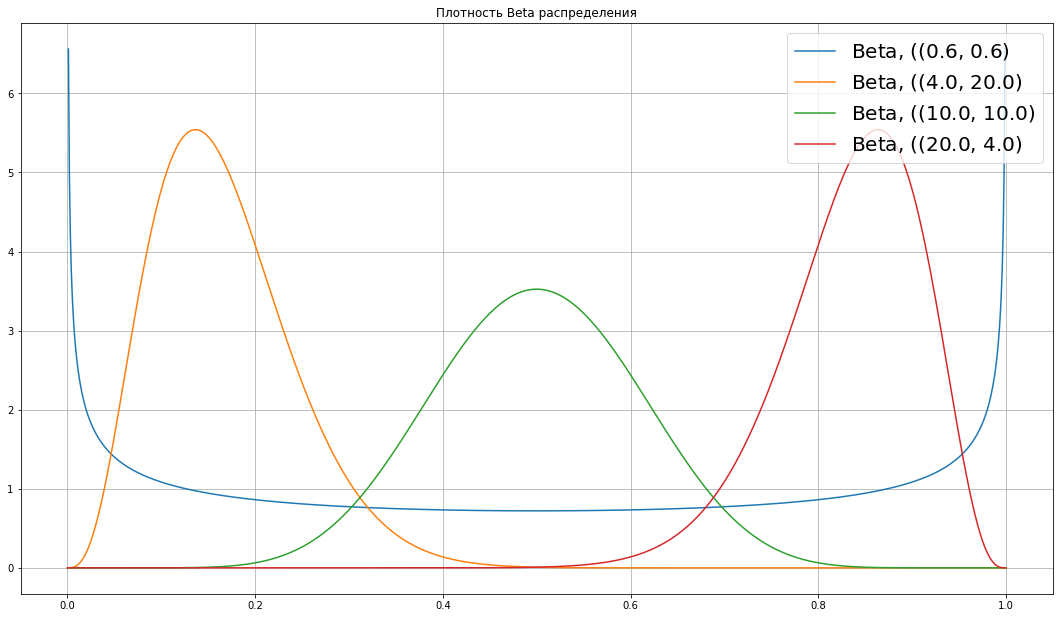

In [117]:
params = np.array([(0.6, 0.6), (4,20), (10,10), (20,4)])

plt.title(r'Плотность Beta распределения')
for i in range(0, len(params)):
    alpha_0 = params[i][0]
    beta_0 = params[i][1]
    x = np.linspace(0,1,1000)
    plt.plot(x, st.beta.pdf(x,a=alpha_0,b=beta_0), label='Beta, $(\alpha, \beta)=$({}, {})'.format(alpha_0, beta_0))
    print(r'Матожидание Beta({},{}) = {}'.format(alpha_0, beta_0, alpha_0/(alpha_0+beta_0)))
plt.legend(fontsize=20, loc=1)
fig = plt.gcf()
plt.grid(True)
fig.set_size_inches(18.5, 10.5)

Априорнын знания о монете:
- $Beta(0.6,0.6)$ - монета нечестная (наименее вероятны значения $𝑝$ в окрестности 0.5)
- $Beta(4,20)$ - монета, скорее всего, нечестная, перевес в сторону решки (наиболее вероятны значения $𝑝$ в окрестности 0)
- $Beta(20,4)$ - монета, скорее всего, нечестная, перевес в сторону орла (наиболее вероятны значения $𝑝$ в окрестности 1)
- $Beta(10,10)$ - монета, скорее, честна (наиболее вероятны значения $𝑝$ в окрестности 0.5)

Построим график ошибки от $n$ для различных оценок.

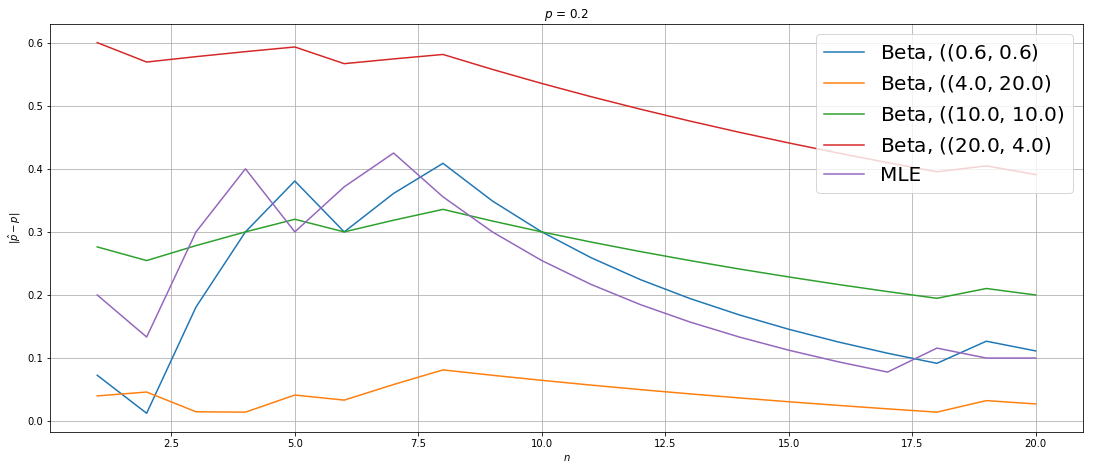

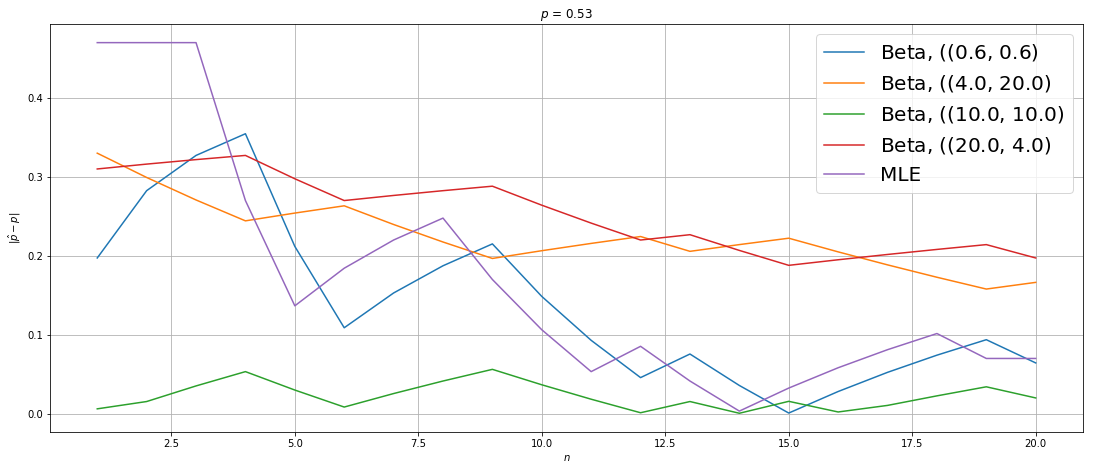

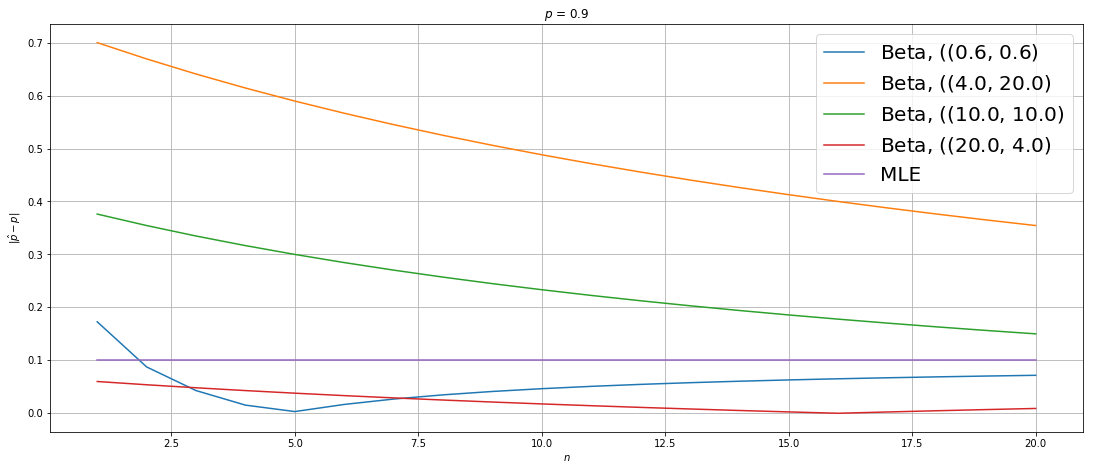

In [118]:
for k in range(len(ps)):
    fig = plt.gcf()
    plt.grid(True)
    fig.set_size_inches(18.5, 7.5)
    stat_bayes = np.zeros(size+1)
    for i in range(0, len(params)):
        alpha_0 = params[i][0]
        beta_0 = params[i][1]
        for j in range(1, size+1):
            stat_bayes[j] = Bayesian(alpha_0, beta_0, results[k][:j])
        plt.plot(np.arange(1,size+1), abs(stat_bayes[1:] - ps[k]), label='Beta, $(\alpha, \beta)=$({}, {})'.format(alpha_0, beta_0))
    plt.plot(np.arange(1,size+1), abs(thetas[k][1:] - ps[k]), label = r'MLE')
    plt.xlabel(r'$n$')
    plt.ylabel(r'$|\hat{p} - p |$')
    plt.legend(fontsize=20, loc=1)
    plt.title(r'$p$ = {}'.format(ps[k]))
    plt.show()

### При p = 0.2
Случай, когда монета нечестная, перевес в сторону решки.
Наилучшем образом ведет себя байесовских оценка с априорным распределением $Beta(4,20)$, чуть хуже $Beta(0.6,0.6)$ и оценка ОМП 

### При p = 0.9
Случай, когда монета нечестная, перевес в сторону орла.
Наилучшем образом ведет себя байесовских оценка с априорным распределением $Beta(20,4)$ и $Beta(0.6,0.6)$. Чуть хуже ведет себя оценка ОМП.

### При p = 0.53
Случай, когда монета почти честная, но небольшой перевес в сторону орла.
Наилучшем образом ведет себя байесовских оценка с априорным распределением $Beta(10,10)$ . Чуть хуже $Beta(0.6,0.6)$ и ОМП.

## Вывод 
Таким образом мы видим, что использование байесовских оценок актуально тогда, когда мы наверняка знаем априорные данные о параметрах распределения, что вполне может дать выйгрыш в точности по сравнению с ОМП. В случае когда априорные данные неверны, получаем, что метод ОМП работает лучше.